# Fake News Classification

#### Fake news classification is a process that involves analyzing news content to determine its truthfulness. The ultimate goal of this project is to build a reliable and efficient algorithm that can accurately classify news articles as either fake or genuine, and thus help users make informed decisions when consuming information online. In this we use different machine learning models to classify the news.



#### Dataset: https://www.kaggle.com/datasets/bhavikjikadara/fake-news-detection

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string
from sklearn.metrics import accuracy_score
from joblib import dump,load

import warnings 
warnings.filterwarnings('ignore')

C:\Users\laksh\AppData\Local\Temp\ipykernel_17772\1196268165.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Importing Dataset

In [3]:
df_fake = pd.read_csv("Fake.csv")
df_true = pd.read_csv("True.csv")

In [4]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


## Inserting a column "class" as target feature

In [6]:
df_fake["class"] = 0
df_true["class"] = 1

In [7]:
df_fake.shape, df_true.shape

((23481, 5), (21417, 5))

In [8]:
# Removing last 10 rows for manual testing
df_fake_manual_testing = df_fake.tail(10)
for i in range(23480,23470,-1):
    df_fake.drop([i], axis = 0, inplace = True)
    
    
df_true_manual_testing = df_true.tail(10)
for i in range(21416,21406,-1):
    df_true.drop([i], axis = 0, inplace = True)

In [9]:
df_fake.shape, df_true.shape

((23471, 5), (21407, 5))

In [10]:
df_fake_manual_testing["class"] = 0
df_true_manual_testing["class"] = 1

In [11]:
df_fake_manual_testing.head(10)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [12]:
df_true_manual_testing.head(10)

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [13]:
df_manual_testing = pd.concat([df_fake_manual_testing,df_true_manual_testing], axis = 0)
df_manual_testing.to_csv("Data/manual_testing.csv",index=False)

## Merging True and Fake Dataframes

In [14]:
df_merge = pd.concat([df_fake, df_true], axis =0 )
df_merge.sample(10)

,title,text,subject,date,class
10304,BREAKING: DNC HACKER FIRED For Bank Fraud…Blam...,Apparently breaking the law and scamming the g...,politics,"Jul 26, 2017",0
20137,SCARY! LEAKED EMAIL PROVES Radical Billionaire...,It was announced last week that George Soros w...,left-news,"Aug 11, 2016",0
2718,Canada’s Trudeau Throws MAJOR Shade At ‘Grizz...,Canadian Prime Minister Justin Trudeau is a di...,News,"February 2, 2017",0
15981,FLASHBACK: TRUMP PLANS STRATEGY Against North ...,There is no debating the fact that tensions be...,Government News,"Aug 8, 2017",0
6852,Republicans Punish Georgia Governor For Refus...,Georgia conservatives really wanted to enshrin...,News,"April 17, 2016",0
10058,MARK STEYN’S HYSTERICAL Take On Hillary’s “Bac...,Steyn: Now Hillary knows how Bill s victims f...,politics,"Aug 23, 2017",0
22943,"Trump, Liberal Hypocrisy & Humanity’s Future",21st Century Wire says Here s an epic discussi...,Middle-east,"March 19, 2017",0
4761,"Tillerson pledges safe areas for refugees, mor...",WASHINGTON (Reuters) - Secretary of State Rex ...,politicsNews,"March 22, 2017",1
12391,TRUMP GIVES BRUTAL WARNING To Lawless Sanctuar...,.@KrisKobach1787: Trump has made clear that sa...,politics,"Nov 15, 2016",0
18368,RADICAL NYC MAYOR Skips NYPD Swearing In Cerem...,Mayor Bill de Blasio on Thursday skipped an NY...,left-news,"Jul 7, 2017",0


In [15]:
df_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

## Removing columns which are not required

In [16]:
df = df_merge.drop(["title", "subject","date"], axis = 1)

In [17]:
df.isnull().sum()

text     0
class    0
dtype: int64

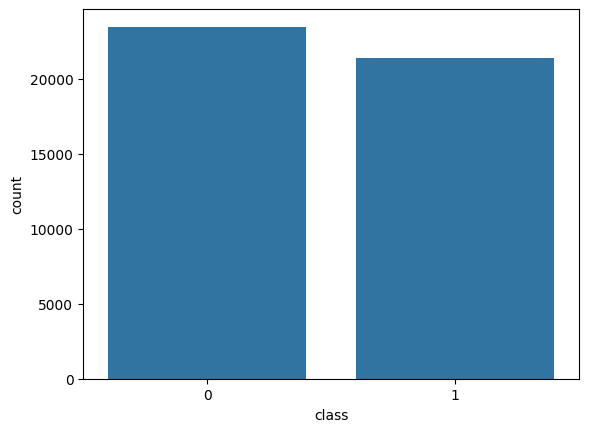

In [18]:
sns.countplot(x=df['class'])
plt.show()

## Random Shuffling the dataframe

In [19]:
df = df.sample(frac = 1)

In [20]:
df.head()

,text,class
789,"Taking Donald Trump s erratic, unpredictable b...",0
8948,"Just about every day, Rush Limbaugh s big fat ...",0
3518,While Donald Trump may have spent a lot of tim...,0
19311,(Reuters) - The head of a G4S-run immigration ...,1
19674,#SourcesHaveConfirmed that Trump will lock her...,0


In [21]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

In [22]:
df.columns

Index(['text', 'class'], dtype='object')

In [23]:
df.head()

,text,class
0,"Taking Donald Trump s erratic, unpredictable b...",0
1,"Just about every day, Rush Limbaugh s big fat ...",0
2,While Donald Trump may have spent a lot of tim...,0
3,(Reuters) - The head of a G4S-run immigration ...,1
4,#SourcesHaveConfirmed that Trump will lock her...,0


## Creating a function to process the texts

In [24]:
def wordopt(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    
    # Remove digits
    text = re.sub(r'\d', '', text)
    
    # Remove newline characters
    text = re.sub(r'\n', ' ', text)
    
    return text


In [25]:
df["text"] = df["text"].apply(wordopt)

## Defining dependent and independent variables

In [26]:
x = df["text"]
y = df["class"]

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

x_train.to_csv("Data/x_train.csv",index=False)
x_test.to_csv("Data/x_test.csv",index=False)
y_train.to_csv("Data/y_train.csv",index=False)
x_test.to_csv("Data/y_test.csv",index=False)

## Splitting Training and Testing

## Convert text to vectors

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

## Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(xv_train,y_train)
print('train score: ',LR.score(xv_train,y_train)*100)

train score:  99.3225978964882


In [43]:
dump(LR,'models/logistic_regression.pkl')

['models/logistic_regression.pkl']

In [45]:
pred_lr=LR.predict(xv_test)

In [46]:
LR_accuracy= LR.score(xv_test, y_test)
print("Accuracy:", LR_accuracy*100)

Accuracy: 98.87700534759358


In [47]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5873
           1       0.99      0.99      0.99      5347

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



## Decision Tree Classification

In [38]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)
print('train score: ',DT.score(xv_train,y_train)*100)

train score:  99.99702893814249


In [39]:
dump(DT,'models/DT.pkl')

['models/DT.pkl']

In [48]:
pred_dt = DT.predict(xv_test)

In [49]:
DT_accuracy = DT.score(xv_test, y_test)
print("Accuracy:", DT_accuracy*100)

Accuracy: 99.61675579322639


In [50]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5873
           1       1.00      1.00      1.00      5347

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



## Gradient Boosting Classifier

In [51]:
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train, y_train)
print('train score: ',GBC.score(xv_train,y_train)*100)

train score:  99.67912531938914


In [52]:
dump(GBC,'models/GBC.pkl')

['models/GBC.pkl']

In [53]:
pred_gbc = GBC.predict(xv_test)

In [54]:
GBC_accuracy= GBC.score(xv_test, y_test)
print("Accuracy:", GBC_accuracy*100)

Accuracy: 99.53654188948306


In [55]:
print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5873
           1       0.99      1.00      1.00      5347

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



## Random Forest Classifier

In [56]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)
print('train score: ',RFC.score(xv_train,y_train)*100)

train score:  99.99702893814249


In [61]:
dump(RFC,'models/RFC.pkl')

['models/RFC.pkl']

In [58]:
pred_rfc = RFC.predict(xv_test)

In [59]:
RFC_accuracy = RFC.score(xv_test, y_test)
print("Accuracy:", RFC_accuracy*100)

Accuracy: 98.82352941176471


In [60]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5873
           1       0.99      0.99      0.99      5347

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



## Model Testing

In [62]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GBC = GBC.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {}".format(output_lable(pred_LR[0]),                                                                                                       output_lable(pred_DT[0]), 
                                                                                                              
                                                                                                        output_lable(pred_GBC[0]), 
                                                                                                              output_lable(pred_RFC[0])))

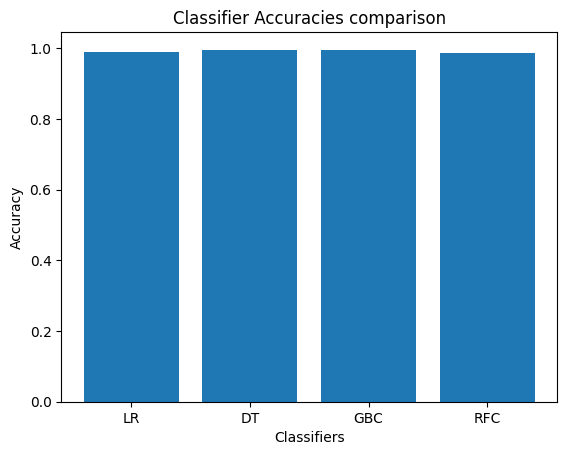

In [63]:
# Define the names of classifiers and their corresponding accuracy scores
classifiers = ['LR', 'DT', 'GBC', 'RFC']
accuracies = [LR_accuracy, DT_accuracy, GBC_accuracy, RFC_accuracy]

plt.bar(classifiers, accuracies)
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Classifier Accuracies comparison')
plt.show()

In [64]:
news = str(input())
manual_testing(news)

 21st Century Wire says Al Jazeera America will go down in history as one of the biggest failures in broadcast media history.Ever since the US and its allies began plotting to overthrow Libya and Syria, Al Jazeera has deteriorated from a promising international news network in 2003   into what it has become in 2016   a full-blown agit prop media shop for the US State Department and the Pentagon. In fact, US Military Central Command (CENTCOM) for the Middle East region is located in Qatar s capital of Doha, conveniently located just down the road from Al Jazeera s headquarters. Nice and cozy.Al Jazeera s role in promoting  regime change  and the destablization of Syria is now recorded history, as are its many shameful exhibitions of media fakery.The Qatari royals tried to expand propaganda operations into North America, but no matter how much money they threw at it (and those royals just love throwing money at things to try and get them to work), no one cared about it, much less watched



LR Prediction: Fake News 
DT Prediction: Fake News 
GBC Prediction: Fake News 
RFC Prediction: Fake News


In [65]:
news = str(input())
manual_testing(news)

 MINSK (Reuters) - In the shadow of disused Soviet-era factories in Minsk, a street lined with eclectic bars, art galleries and yoga studios has become a haven from the vigilant eyes of the Belarussian authorities.  This place is like an island,  said Yegor, 21, who works at  popular bar Hooligan.  It s the street of freedom.  The government of President Alexander Lukashenko, who has ruled Belarus for the past 23 years and has boasted that he is  the last and only dictator in Europe  ,has little tolerance for any opposition. A powerful police force and feared state security  keep citizens in check. But police patrols are rare in Oktyabrskaya, partly due to its location on an out-of-the-way peninsula in a bend of the river Svislach. When the first restaurant opened there in 2012, few visitors came but now it ranks among the most fashionable quarters of Minsk.  Such is the growing popularity of that Oktyabrskaya that investors such as Belgazprombank, a subsidiary of state-owned Russian l



LR Prediction: Not A Fake News 
DT Prediction: Not A Fake News 
GBC Prediction: Not A Fake News 
RFC Prediction: Not A Fake News
